In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [3]:
def odwrotna_dystrybuanta(lambda_t, T, num_simulations=10000):
    # Wygenerowanie zmiennych losowych N_t z rozkładu Poissona
    mean_lambda_integral = np.trapz([lambda_t(t) for t in np.linspace(0, T, 1000)], dx=T/1000)
    poisson_dist = poisson(mu=mean_lambda_integral)
    N_t = poisson_dist.rvs(size=num_simulations)
    
    # Generowanie czasów oczekiwania
    waiting_times = []
    for n in N_t:
        u = np.random.uniform(size=n)
        F_inverse = lambda x: np.searchsorted(np.cumsum([lambda_t(t) / mean_lambda_integral for t in np.linspace(0, T, 1000)]), x)
        waiting_times.extend([F_inverse(ui) for ui in u])
    
    return waiting_times

In [4]:
def niejednorodny_proces_poissona(lambda_t, T):
    t = 0
    event_times = []
    while t < T:
        u = np.random.uniform()
        inter_event_time = -np.log(u) / lambda_t(t)
        t_candidate = t + inter_event_time
        if t_candidate < T:
            event_times.append(t_candidate)
            t = t_candidate
        else:
            break
    return event_times


In [5]:
def lambda_1(t):
    return 0.5 + 0.2 * np.sin(2 * np.pi * t / 24)

def lambda_2(t):
    return 0.8 + 0.3 * np.cos(2 * np.pi * t / 24)

T = 24

In [6]:
# Generowanie procesu z metody odwrotnej dystrybuanty
waiting_times_inverse = odwrotna_dystrybuanta(lambda_1, T)

# Generowanie procesu z łączenia niezależnych procesów Poissona
events_poisson = niejednorodny_proces_poissona(lambda_2, T)

# Połączenie obu procesów
all_events = waiting_times_inverse + events_poisson
all_events.sort()

# Obliczenie dystrybuanty empirycznej
empirical_cdf_combined = np.arange(1, len(all_events) + 1) / len(all_events)

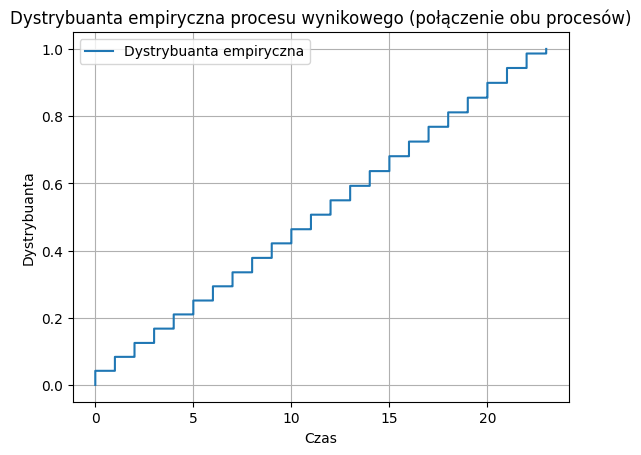

In [7]:
# Wykres dystrybuanty empirycznej procesu wynikowego
plt.step(all_events, empirical_cdf_combined, label='Dystrybuanta empiryczna', where='post')
plt.xlabel('Czas')
plt.ylabel('Dystrybuanta')
plt.title('Dystrybuanta empiryczna procesu wynikowego (połączenie obu procesów)')
plt.legend()
plt.grid(True)
plt.show()
